In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import vice
import sys
sys.path.append("../")
from vice_utils import calculate_z, sample_stars, filter_stars, show_stars, R_to_zone, zone_to_R, show_at_R_z
from imp import reload
import vice_utils

/home/daniel/surp/VICE/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


In [3]:
sz_model = vice.singlezone(name="sz_model", elements=["c", "o", "n", "fe"])
sz_out = sz_model.run(np.arange(0, 13.2, 0.01), capture=True)

Output directory already exists. Overwriting will delete all of its contents, leaving only the results of the current simulation.
Output directory: sz_model.vice
Overwite? (y | n) n


In [17]:
vice.yields.agb.settings["c"] = "ventura13"

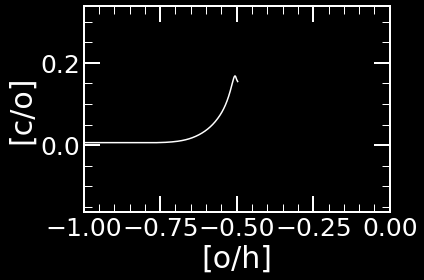

In [20]:
sz_out.show("[c/o]-[o/h]", xlim=(-1,0))

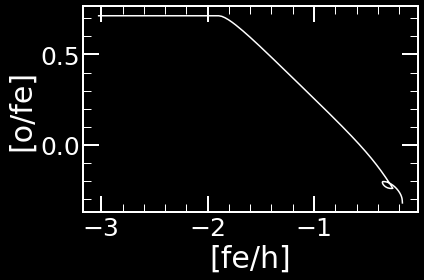

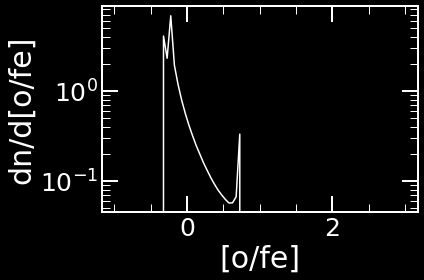

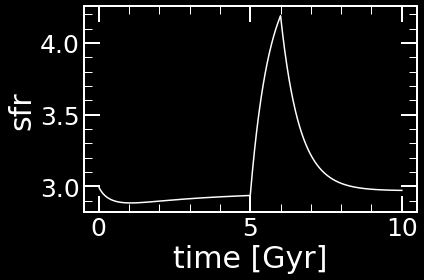

In [21]:
def infall_rate(t):
    delta_t = 1
    delta_M = 5*10**9
    t0 = 5
    if (t0 <= t and t < t0 + delta_t):
        return 9.1 + delta_M/delta_t/10**9
    else:
        return 9.1

example = vice.singlezone(name="gas-burst", func=infall_rate, mode="ifr", dt=0.001, elements=("n", "o", "fe", "c"))
example.run(np.linspace(0, 10, 1001), overwrite=True)
gas_burst = vice.output("gas-burst")

gas_burst.show("[o/fe]-[fe/h]")
gas_burst.show("dn/d[o/fe]")
gas_burst.show("sfr")

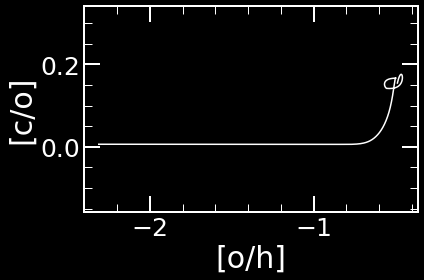

In [26]:
gas_burst.show("[c/o]-[o/h]")

In [25]:
vice.yields.agb.settings["c"] = "karakas10"

In [38]:
def plot_cooh_sfh():
    for tau_sfh in (2.5, 5, 40):
        def infall_rate(t):
            return 10*np.exp(-t/tau_sfh)

        example = vice.singlezone(name="exp-decline", func=infall_rate, nthreads=4, mode="ifr", dt=0.001, elements=("n", "o", "fe", "c"))
        example.run(np.linspace(0, 10, 1001), overwrite=True)
        exp_decline = vice.output("exp-decline")

        plt.plot(exp_decline.history["[o/h]"], exp_decline.history["[c/o]"], label=tau_sfh)
    
    plt.xlabel("[o/h]")
    plt.ylabel("[c/o]")
    plt.legend(title="tau_sfh")

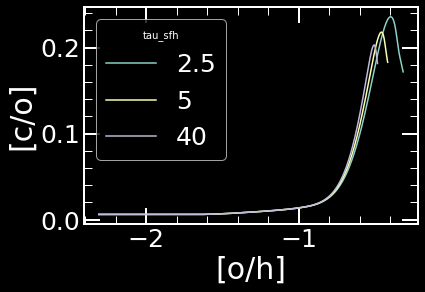

In [33]:
vice.yields.agb.settings["c"] = "karakas10"
plot_cooh_sfh()

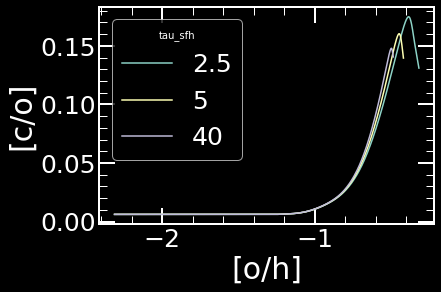

In [34]:
vice.yields.agb.settings["c"] = "karakas16"
plot_cooh_sfh()

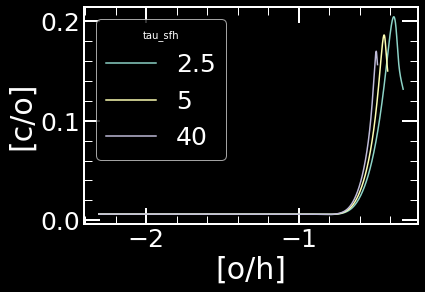

In [39]:
vice.yields.agb.settings["c"] = "ventura13"
plot_cooh_sfh()

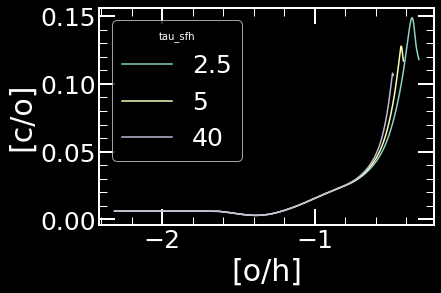

In [40]:
vice.yields.agb.settings["c"] = "cristallo11"
plot_cooh_sfh()

In [6]:
vice.milkyway?

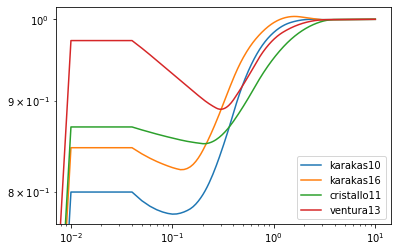

In [13]:
for model in ["karakas10", "karakas16", "cristallo11", "ventura13"]:
    vice.yields.agb.settings["c"] = model
    m_c, times = vice.single_stellar_population("c")
    plt.plot(times, np.array(m_c)/m_c[-1], label=model)
plt.xscale("log")
plt.yscale("log")
plt.legend()

In [ ]:
#plot mass_0 against z